# Assignement 3

## Imports and installs

In [71]:
%pip install numpy pandas sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... \^C
anceled
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [106]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import preprocessing
import matplotlib.pyplot as plt 

## Task 0

In [107]:
data = pd.read_csv("./data/iris_clusters.csv", delimiter=";")
data

,pl,pw,sl,sw,id
0,6.7,3.0,4.6,1.5,87.0
1,6.7,2.8,4.6,1.2,209.0
2,5.0,3.6,1.6,0.5,344.0
3,6.3,3.1,5.9,2.5,401.0
4,7.0,2.9,5.7,1.7,430.0
...,...,...,...,...,...
295,6.8,3.0,5.0,2.5,14842.0
296,5.7,2.6,4.9,1.9,14843.0
297,5.6,3.4,1.2,0.2,14887.0
298,5.4,2.6,4.3,1.2,14941.0


## Task 1 K-means

,pl,pw,sl,sw,id,Cluster,Outlier_LOF,LOF_Score
0,6.7,3.0,4.6,1.5,87.0,1,0,-0.955893
1,6.7,2.8,4.6,1.2,209.0,1,0,-1.124129
2,5.0,3.6,1.6,0.5,344.0,0,0,-0.975022
3,6.3,3.1,5.9,2.5,401.0,1,0,-0.971238
4,7.0,2.9,5.7,1.7,430.0,1,0,-1.149769
...,...,...,...,...,...,...,...,...
295,6.8,3.0,5.0,2.5,14842.0,1,0,-1.082931
296,5.7,2.6,4.9,1.9,14843.0,1,0,-1.014087
297,5.6,3.4,1.2,0.2,14887.0,0,0,-0.989192
298,5.4,2.6,4.3,1.2,14941.0,1,0,-1.033627


array([[ 4.9490566 ,  3.3754717 ,  1.46226415,  0.31037736],
       [ 6.20829016,  2.81813472,  4.91865285,  1.72797927],
       [50.        ,  3.7       ,  1.6       ,  0.5       ]])

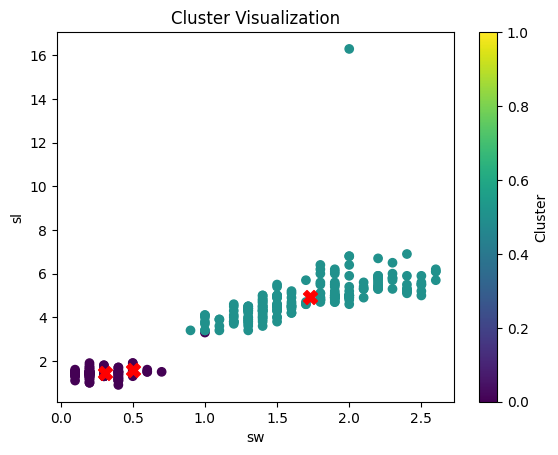

,pl,pw,sl,sw,id,Cluster,Outlier_LOF,LOF_Score
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,5.909333,3.018000,3.686333,1.223000,7989.316667,0.650000,0.050000,-1.183337
std,2.675814,0.447598,1.890350,0.764451,4277.531346,0.484716,0.218309,0.871825
min,4.100000,1.900000,0.900000,0.100000,87.000000,0.000000,0.000000,-13.698762
25%,5.075000,2.775000,1.500000,0.400000,4034.500000,0.000000,0.000000,-1.127088
50%,5.700000,3.000000,4.300000,1.400000,8347.500000,1.000000,0.000000,-1.037846
75%,6.400000,3.300000,5.000000,1.900000,11716.000000,1.000000,0.000000,-0.993168
max,50.000000,4.500000,16.300000,2.600000,14950.000000,2.000000,1.000000,-0.943111


In [140]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(data[['pl', 'pw', 'sl', 'sw']])  # Include only the features that are relevant for clustering
data['Cluster'] = kmeans.labels_
display(data)
centroids = kmeans.cluster_centers_
display(centroids)

plt.scatter(data['sw'], data['sl'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[ :,3], kmeans.cluster_centers_[:,2], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('sw')
plt.ylabel('sl')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()
display(data.describe())



They don't coincide with the previously mentioned groups because the kmeans do not divide in this case per species maybe because it is influenced by outliers. 

## TASK 2: preprocessing

In [ ]:
print(data.columns)

Index(['pl', 'pw', 'sl', 'sw', 'id', 'Cluster'], dtype='object')


array([[0.05664488, 0.42307692, 0.24025974, 0.56      ],
       [0.05664488, 0.34615385, 0.24025974, 0.44      ],
       [0.01960784, 0.65384615, 0.04545455, 0.16      ],
       ...,
       [0.03267974, 0.57692308, 0.01948052, 0.04      ],
       [0.02832244, 0.26923077, 0.22077922, 0.44      ],
       [0.03485839, 0.30769231, 0.21428571, 0.48      ]])

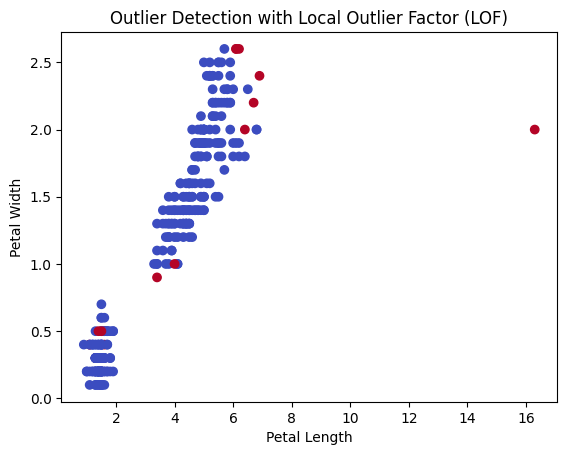

,pl,pw,sl,sw,id,Cluster,Outlier_LOF,LOF_Score
119,50.0,3.7,1.6,0.5,6172.0,2,1,-13.698762
43,7.2,2.8,16.3,2.0,2808.0,0,1,-7.782663
83,4.4,2.3,1.1,0.4,4692.0,1,1,-3.572673
42,4.5,2.2,1.3,0.3,2742.0,1,1,-3.561293
252,4.4,2.4,1.4,0.5,12642.0,1,1,-3.062961


In [121]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
data_to_scale = data[['pl', 'pw', 'sl', 'sw']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)
display(scaled_data)

# Applica Local Outlier Factor (LOF) sui dati rilevanti
lof = LocalOutlierFactor(n_neighbors=10)  # Imposta il numero di vicini
outlier_labels = lof.fit_predict(scaled_data)

# LOF restituisce -1 per gli outlier e 1 per gli inliers
data['Outlier_LOF'] = (outlier_labels == -1).astype(int)


# Visualize the outliers (e.g., using Petal Length and Petal Width)
plt.scatter(data.iloc[:, 2], data.iloc[:, 3], c=data['Outlier_LOF'], cmap='coolwarm')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Outlier Detection with Local Outlier Factor (LOF)')
plt.show()

# Step 2: Show top 5 outliers based on LOF scores (lowest negative values are outliers)
lof_scores = lof.negative_outlier_factor_
data['LOF_Score'] = lof_scores

# Sort by LOF score to get the most significant outliers
outliers = data[data['Outlier_LOF'] == 1].sort_values(by='LOF_Score', ascending=True).head(5)

# Display the top 5 outliers
display(outliers)


In [122]:
print(data.columns)

Index(['pl', 'pw', 'sl', 'sw', 'id', 'Cluster', 'Outlier_LOF', 'LOF_Score'], dtype='object')


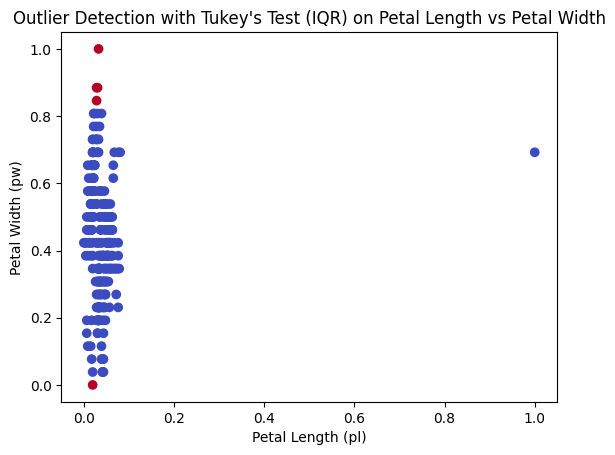

Outlier_Tukey_pl    1
Outlier_Tukey_pw    5
Outlier_Tukey_sl    1
Outlier_Tukey_sw    0
dtype: int64
Outliers in pl: [119]
Outliers in pw: [36, 46, 168, 225, 255]
Outliers in sl: [43]
Outliers in sw: []


,pl,pw,sl,sw,Outlier_Tukey_pl,Outlier_Tukey_pw,Outlier_Tukey_sl,Outlier_Tukey_sw
count,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.0
mean,0.039419,0.430000,0.180931,0.44920,0.003333,0.016667,0.003333,0.0
std,0.058297,0.172153,0.122750,0.30578,0.057735,0.128233,0.057735,0.0
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
25%,0.021242,0.336538,0.038961,0.12000,0.000000,0.000000,0.000000,0.0
50%,0.034858,0.423077,0.220779,0.52000,0.000000,0.000000,0.000000,0.0
75%,0.050109,0.538462,0.266234,0.72000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.0


In [142]:
scaled_df = pd.DataFrame(scaled_data, columns=['pl', 'pw', 'sl', 'sw'])
# Function to apply Tukey's method for outlier detection
def tukey_outliers(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Apply Tukey's Test for each feature (pl, pw, sl, sw)
feature_columns = ['pl', 'pw', 'sl', 'sw']

for col in feature_columns:
    scaled_df[f'Outlier_Tukey_{col}'] = tukey_outliers(scaled_df, col).astype(int)

# Visualize the outliers for one feature (e.g., pl and pw)
plt.scatter(scaled_df['pl'], scaled_df['pw'], c=scaled_df['Outlier_Tukey_pw'], cmap='coolwarm')
plt.xlabel('Petal Length (pl)')
plt.ylabel('Petal Width (pw)')
plt.title('Outlier Detection with Tukey\'s Test (IQR) on Petal Length vs Petal Width')
plt.show()

# Count total outliers detected by Tukey's test for each feature
outlier_summary = scaled_df[[f'Outlier_Tukey_{col}' for col in feature_columns]].sum()

# Display the count of outliers per feature
print(outlier_summary)
# Obtain the indices of outliers for each feature
outlier_indices = {}

for col in feature_columns:
    outliers = scaled_df[scaled_df[f'Outlier_Tukey_{col}'] == 1]
    outlier_indices[col] = outliers.index.tolist()

# Print the indices of the outliers for each feature
for feature, indices in outlier_indices.items():
    print(f"Outliers in {feature}: {indices}")

display(scaled_df.describe())

it's better to use the tukey methods to detect outliers in this case because is simpler and more appropriate when looking for extreme outliers in individual features.

In [143]:

outliers_pl = [119]
outliers_pw = [36, 46, 168, 225, 255]
outliers_sl = [43]
all_outliers = set(outliers_pl + outliers_pw + outliers_sl)
scaled_df = pd.concat([scaled_df, data[['Cluster', 'id']]], axis=1)

filtered_data = scaled_df.drop(index=all_outliers)


print(filtered_data)



           pl        pw        sl    sw  Outlier_Tukey_pl  Outlier_Tukey_pw  \
0    0.056645  0.423077  0.240260  0.56                 0                 0   
1    0.056645  0.346154  0.240260  0.44                 0                 0   
2    0.019608  0.653846  0.045455  0.16                 0                 0   
3    0.047930  0.461538  0.324675  0.96                 0                 0   
4    0.063181  0.384615  0.311688  0.64                 0                 0   
..        ...       ...       ...   ...               ...               ...   
295  0.058824  0.423077  0.266234  0.96                 0                 0   
296  0.034858  0.269231  0.259740  0.72                 0                 0   
297  0.032680  0.576923  0.019481  0.04                 0                 0   
298  0.028322  0.269231  0.220779  0.44                 0                 0   
299  0.034858  0.307692  0.214286  0.48                 0                 0   

     Outlier_Tukey_sl  Outlier_Tukey_sw  Cluster   

               pl          pw          sl          sw  Outlier_Tukey_pl  \
count  293.000000  293.000000  293.000000  293.000000             293.0   
mean     0.036241    0.424390    0.180688    0.454061               0.0   
std      0.017451    0.162177    0.112926    0.305608               0.0   
min      0.000000    0.038462    0.000000    0.000000               0.0   
25%      0.019608    0.307692    0.038961    0.120000               0.0   
50%      0.034858    0.423077    0.220779    0.520000               0.0   
75%      0.050109    0.538462    0.266234    0.720000               0.0   
max      0.080610    0.807692    0.389610    1.000000               0.0   

       Outlier_Tukey_pw  Outlier_Tukey_sl  Outlier_Tukey_sw     Cluster  \
count             293.0             293.0             293.0  293.000000   
mean                0.0               0.0               0.0    0.348123   
std                 0.0               0.0               0.0    0.477190   
min                 0.0 

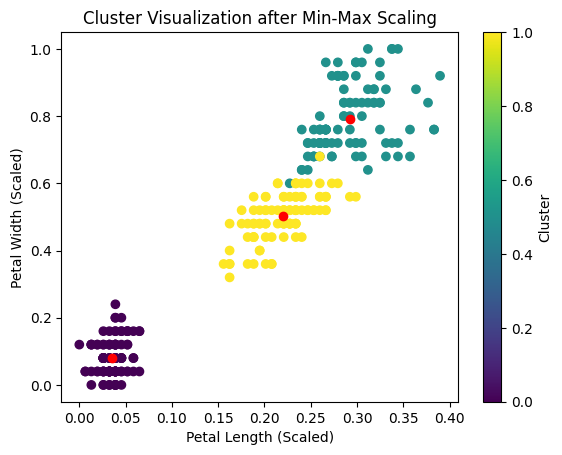

In [137]:
print(filtered_data.describe())
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(filtered_data[['pl', 'pw', 'sl', 'sw']])

# Step 4: Add the cluster labels to the DataFrame
filtered_data['Cluster'] = kmeans.labels_

# Step 5: Visualize the clusters
plt.scatter(filtered_data.iloc[:, 2], filtered_data.iloc[:, 3], c=filtered_data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:, 3], c = 'r')
plt.xlabel('Petal Length (Scaled)')
plt.ylabel('Petal Width (Scaled)')
plt.title('Cluster Visualization after Min-Max Scaling')
plt.colorbar(label='Cluster')
plt.show()

because the outliers don't significantly distort the data (infact it's possible to verify that the mean and the sd of the features remain quite the same, before and after removing outliers even if we have scaled the data before outlier detection) and because the data is on very different scales, is better rescaling data before outlier detection. 

## Task 3

K=2, Davies-Bouldin Index: 0.4998
K=3, Davies-Bouldin Index: 0.7134
K=4, Davies-Bouldin Index: 0.8288
K=5, Davies-Bouldin Index: 0.8703
K=6, Davies-Bouldin Index: 0.8337
K=7, Davies-Bouldin Index: 0.8251
K=8, Davies-Bouldin Index: 0.9022
K=9, Davies-Bouldin Index: 0.9404
K=10, Davies-Bouldin Index: 0.9133


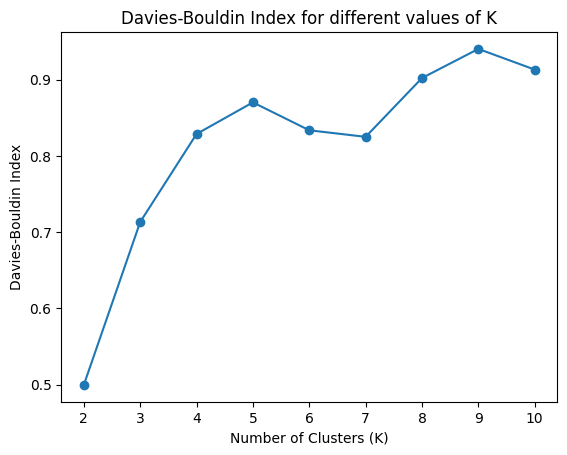

In [138]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt


X = filtered_data[['pl', 'pw', 'sl', 'sw']] 
davies_bouldin_scores = []
for k in range(2, 11):
    # Step 1: Fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Step 2: Get cluster labels
    labels = kmeans.labels_
    
    # Step 3: Compute Davies-Bouldin score
    db_score = davies_bouldin_score(X, labels)
    
    # Store the score
    davies_bouldin_scores.append(db_score)
    
    # Print the score for each K
    print(f'K={k}, Davies-Bouldin Index: {db_score:.4f}')

# Step 4: Plot the Davies-Bouldin scores
plt.plot(range(2, 11), davies_bouldin_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for different values of K')
plt.show()


the index has a lower value in K=2 so we are going to set k=2.

               pl          pw          sl          sw  Outlier_Tukey_pl  \
count  293.000000  293.000000  293.000000  293.000000             293.0   
mean     0.036241    0.424390    0.180688    0.454061               0.0   
std      0.017451    0.162177    0.112926    0.305608               0.0   
min      0.000000    0.038462    0.000000    0.000000               0.0   
25%      0.019608    0.307692    0.038961    0.120000               0.0   
50%      0.034858    0.423077    0.220779    0.520000               0.0   
75%      0.050109    0.538462    0.266234    0.720000               0.0   
max      0.080610    0.807692    0.389610    1.000000               0.0   

       Outlier_Tukey_pw  Outlier_Tukey_sl  Outlier_Tukey_sw     Cluster  \
count             293.0             293.0             293.0  293.000000   
mean                0.0               0.0               0.0    0.976109   
std                 0.0               0.0               0.0    0.816845   
min                 0.0 

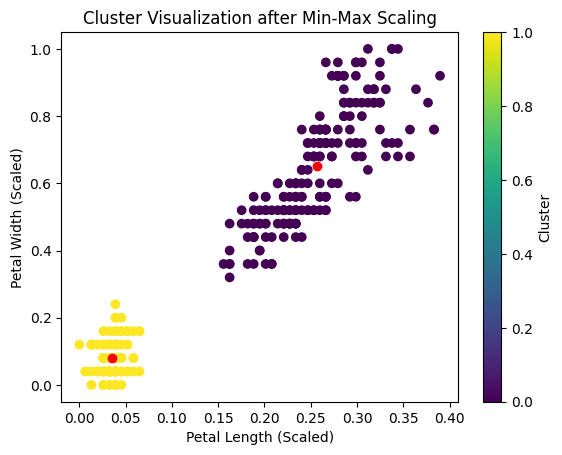

In [139]:
print(filtered_data.describe())
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(filtered_data[['pl', 'pw', 'sl', 'sw']])

# Step 4: Add the cluster labels to the DataFrame
filtered_data['Cluster'] = kmeans.labels_

# Step 5: Visualize the clusters
plt.scatter(filtered_data.iloc[:, 2], filtered_data.iloc[:, 3], c=filtered_data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:, 3], c = 'r')
plt.xlabel('Petal Length (Scaled)')
plt.ylabel('Petal Width (Scaled)')
plt.title('Cluster Visualization after Min-Max Scaling')
plt.colorbar(label='Cluster')
plt.show()